In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:

data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)

In [3]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:

weights_std = np.random.randn(X.shape[1], 1) * 0.01
bias_std = np.zeros(1)
learning_rate = 0.01
epochs = 100

In [5]:

weights_mom = np.random.randn(X.shape[1], 1) * 0.01
bias_mom = np.zeros(1)
velocity_w = np.zeros_like(weights_mom)
velocity_b = np.zeros_like(bias_mom)
beta = 0.9 

In [6]:

losses_std = []
losses_mom = []

In [7]:

for epoch in range(epochs):
    # Standard Gradient Descent
    y_pred_std = np.dot(X_train, weights_std) + bias_std
    loss_std = np.mean((y_pred_std - y_train)**2)
    losses_std.append(loss_std)
    
    error_std = y_pred_std - y_train
    grad_weights_std = np.dot(X_train.T, error_std) / len(X_train)
    grad_bias_std = np.mean(error_std)
    
    weights_std -= learning_rate * grad_weights_std
    bias_std -= learning_rate * grad_bias_std
    
    # Gradient Descent with Momentum
    y_pred_mom = np.dot(X_train, weights_mom) + bias_mom
    loss_mom = np.mean((y_pred_mom - y_train)**2)
    losses_mom.append(loss_mom)
    
    error_mom = y_pred_mom - y_train
    grad_weights_mom = np.dot(X_train.T, error_mom) / len(X_train)
    grad_bias_mom = np.mean(error_mom)
    
    # Update velocity (momentum term)
    velocity_w = beta * velocity_w + (1 - beta) * grad_weights_mom
    velocity_b = beta * velocity_b + (1 - beta) * grad_bias_mom
    
    # Update parameters with momentum
    weights_mom -= learning_rate * velocity_w
    bias_mom -= learning_rate * velocity_b
    
    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d} | Standard Loss: {loss_std:.4f} | Momentum Loss: {loss_mom:.4f}")

Epoch   0 | Standard Loss: 5.6449 | Momentum Loss: 5.6095
Epoch  10 | Standard Loss: 4.7274 | Momentum Loss: 5.2080
Epoch  20 | Standard Loss: 3.9789 | Momentum Loss: 4.5073
Epoch  30 | Standard Loss: 3.3681 | Momentum Loss: 3.8068
Epoch  40 | Standard Loss: 2.8693 | Momentum Loss: 3.1972
Epoch  50 | Standard Loss: 2.4618 | Momentum Loss: 2.6927
Epoch  60 | Standard Loss: 2.1288 | Momentum Loss: 2.2836
Epoch  70 | Standard Loss: 1.8564 | Momentum Loss: 1.9545
Epoch  80 | Standard Loss: 1.6336 | Momentum Loss: 1.6907
Epoch  90 | Standard Loss: 1.4513 | Momentum Loss: 1.4793


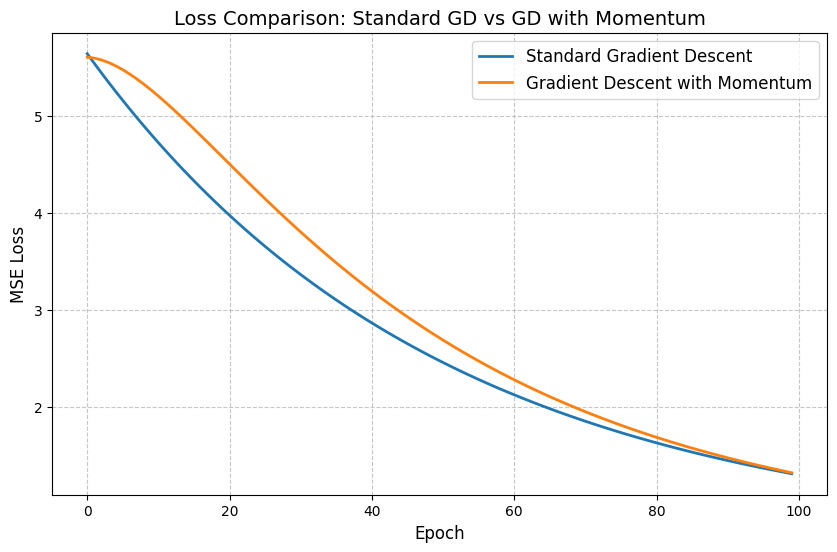

In [8]:

plt.figure(figsize=(10, 6))
plt.plot(losses_std, label='Standard Gradient Descent', linewidth=2)
plt.plot(losses_mom, label='Gradient Descent with Momentum', linewidth=2)
plt.title('Loss Comparison: Standard GD vs GD with Momentum', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [9]:

test_pred_std = np.dot(X_test, weights_std) + bias_std
test_pred_mom = np.dot(X_test, weights_mom) + bias_mom

mse_std = np.mean((test_pred_std - y_test)**2)
mse_mom = np.mean((test_pred_mom - y_test)**2)

print("\nTest Set Performance:")
print(f"Standard GD MSE: {mse_std:.4f}")
print(f"Momentum GD MSE: {mse_mom:.4f}")


Test Set Performance:
Standard GD MSE: 1.2948
Momentum GD MSE: 1.3038


In [10]:

results = pd.DataFrame({
    'Actual': y_test[:10].flatten(),
    'Standard GD': test_pred_std[:10].flatten(),
    'Momentum GD': test_pred_mom[:10].flatten()
})
print("\nFirst 10 Test Predictions:")
print(results.round(4))


First 10 Test Predictions:
   Actual  Standard GD  Momentum GD
0   0.477       0.6396       0.6315
1   0.458       0.9759       0.9619
2   5.000       1.3364       1.3160
3   2.186       1.7710       1.7743
4   2.780       1.3596       1.3422
5   1.587       1.4091       1.4115
6   1.982       1.7587       1.7601
7   1.575       1.3751       1.3667
8   3.400       1.3019       1.3093
9   4.466       2.6400       2.6494


In [11]:

print("\nAnalysis:")
print("1. Momentum accelerates convergence by accumulating velocity in consistent gradient directions")
print("2. The momentum version typically shows smoother loss reduction and faster early-stage learning")
print("3. Both methods should reach similar final performance, but momentum gets there faster")
print("4. The β parameter controls how much history to include in the velocity (0.9 is typical)")


Analysis:
1. Momentum accelerates convergence by accumulating velocity in consistent gradient directions
2. The momentum version typically shows smoother loss reduction and faster early-stage learning
3. Both methods should reach similar final performance, but momentum gets there faster
4. The β parameter controls how much history to include in the velocity (0.9 is typical)
